In [94]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.models.forecasting.tbats import TBATS
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

In [115]:
df = pd.read_excel('geracao.xlsx',header = 1).iloc[1:,13:].fillna(method = 'bfill').iloc[0:1].T.rename({1:'geracao'},axis = 1)
df = df.set_index(pd.date_range(start = '2000-01-01',periods = len(df),freq = 'm'))

<AxesSubplot:xlabel='time'>

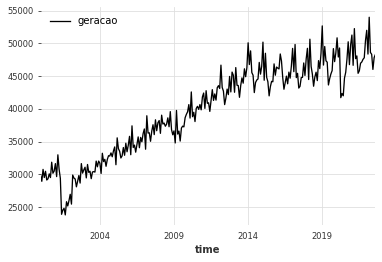

In [125]:
df.plot()

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


<AxesSubplot:xlabel='time'>

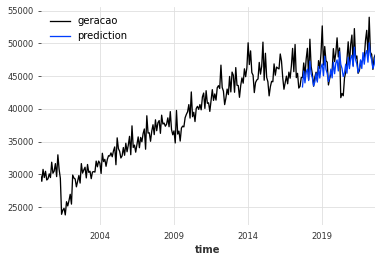

In [137]:
train_df,test_df = df.iloc[:-60],df.iloc[-60:]
transformed_df = train_df.diff().dropna()
train = TimeSeries.from_dataframe(transformed_df)
model = TBATS(use_box_cox = True,box_cox_bounds=(0, 10),use_trend = False,use_arma_errors = True)
model.fit(train)
prediction = model.predict(len(test_df), num_samples=1000)
pred_df = pd.DataFrame(prediction.pd_dataframe().T.mean())
real_pred_df = pred_df.cumsum() + train_df.values.ravel()[-1]
final_df = df.copy()
final_df['prediction'] = real_pred_df
final_df.plot()

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


<AxesSubplot:xlabel='time'>

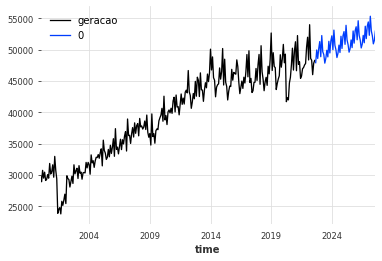

In [138]:
transformed_df = df.diff().dropna()
train = TimeSeries.from_dataframe(transformed_df)
model = TBATS(use_box_cox = True,box_cox_bounds=(0, 10),use_trend = False,use_arma_errors = True)
model.fit(train)
prediction = model.predict(60, num_samples=1000)
pred_df = pd.DataFrame(prediction.pd_dataframe().T.mean())
real_pred_df = pred_df.cumsum() + df.values.ravel()[-1]
final_df = pd.concat([df,real_pred_df])
final_df.plot()